In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('data/clean_df.csv')

In [3]:
df.head()

,date,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
0,2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
1,2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2,2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
3,2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
4,2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


In [4]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [5]:
df.columns

Index(['incident_id', 'governorate', 'district', 'area', 'target',
       'main_category', 'sub_category', 'min_air_raids', 'max_air_raids',
       'civilian_casualties', 'fatalities', 'woman_fatalities',
       'child_fatalities', 'injured', 'woman_injured', 'child_injured',
       'confirmed_time', 'time_of_day'],
      dtype='object')

In [6]:
df = pd.get_dummies(df, columns=['main_category', 'sub_category', 'time_of_day', 'confirmed_time', 'governorate', 'district', 'area', 'target'])

In [7]:
df.head()

,incident_id,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,...,target_three hotels,target_three vehicles,target_two military vehicles,target_unknown,target_unknown,target_vocational Institute,target_water drill,target_water truck,target_water well,target_well
date,,,,,,,,,,,,,,,,,,,,,
2015-03-26,1,1,2.0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,2,1,2.0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,3,1,2.0,29,21,3,14,8,0,7.0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,4,1,2.0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2015-03-26,5,1,2.0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.columns

Index(['incident_id', 'min_air_raids', 'max_air_raids', 'civilian_casualties',
       'fatalities', 'woman_fatalities', 'child_fatalities', 'injured',
       'woman_injured', 'child_injured',
       ...
       'target_three hotels', 'target_three vehicles',
       'target_two military vehicles', 'target_unknown', 'target_unknown ',
       'target_vocational Institute', 'target_water drill',
       'target_water truck', 'target_water well', 'target_well'],
      dtype='object', length=9084)

In [9]:
X = df.drop(columns=['civilian_casualties', 'fatalities', 'woman_fatalities',
       'child_fatalities', 'injured', 'woman_injured', 'child_injured'])
y = df['civilian_casualties']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, shuffle=False)

In [11]:
#y_train = to_categorical(y_train, num_classes=22)
#y_test = to_categorical(y_test, num_classes=22)

In [12]:
y_train.shape

(16863,)

In [13]:
y_test.shape

(5622,)

In [14]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [15]:
input_shape = X_train_ss[0].shape

In [16]:
model = Sequential()

model.add(Dense(256, input_shape=input_shape, activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=100, batch_size = 512)

Epoch 1/100
33/33 [==============================] - 3s 70ms/step - loss: 77.4775 - acc: 0.4965 - val_loss: 22.8149 - val_acc: 0.5731
Epoch 2/100
33/33 [==============================] - 1s 36ms/step - loss: 31.5018 - acc: 0.5883 - val_loss: 22.4500 - val_acc: 0.8621
Epoch 3/100
33/33 [==============================] - 1s 37ms/step - loss: 84.8412 - acc: 0.8309 - val_loss: 22.9605 - val_acc: 0.6677
Epoch 4/100
33/33 [==============================] - 1s 36ms/step - loss: 136.8081 - acc: 0.6693 - val_loss: 23.8288 - val_acc: 0.8600
Epoch 5/100
33/33 [==============================] - 1s 36ms/step - loss: 35.9085 - acc: 0.7285 - val_loss: 25.6799 - val_acc: 0.8248
Epoch 6/100
33/33 [==============================] - 1s 36ms/step - loss: 59.6837 - acc: 0.8406 - val_loss: 23.2556 - val_acc: 0.7097
Epoch 7/100
33/33 [==============================] - 1s 37ms/step - loss: 71.7907 - acc: 0.8218 - val_loss: 26.0294 - val_acc: 0.9146
Epoch 8/100
33/33 [==============================] - 1s 37ms/

Epoch 62/100
33/33 [==============================] - 1s 37ms/step - loss: 68.1986 - acc: 0.9034 - val_loss: 37.3330 - val_acc: 0.9002
Epoch 63/100
33/33 [==============================] - 1s 37ms/step - loss: 35.2681 - acc: 0.9044 - val_loss: 38.0057 - val_acc: 0.9013
Epoch 64/100
33/33 [==============================] - 1s 36ms/step - loss: 13.8191 - acc: 0.9059 - val_loss: 39.3053 - val_acc: 0.8975
Epoch 65/100
33/33 [==============================] - 1s 37ms/step - loss: 9.3469 - acc: 0.9057 - val_loss: 36.9292 - val_acc: 0.8947
Epoch 66/100
33/33 [==============================] - 1s 38ms/step - loss: 9.2112 - acc: 0.9072 - val_loss: 38.2377 - val_acc: 0.8885
Epoch 67/100
33/33 [==============================] - 1s 37ms/step - loss: 24.8420 - acc: 0.9093 - val_loss: 29.2515 - val_acc: 0.8801
Epoch 68/100
33/33 [==============================] - 1s 37ms/step - loss: 10.8668 - acc: 0.9060 - val_loss: 35.9117 - val_acc: 0.8956
Epoch 69/100
33/33 [==============================] - 1s 

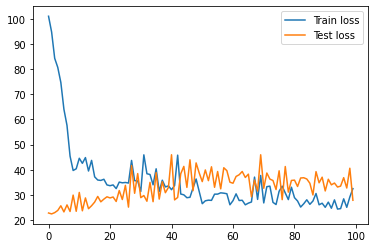

In [17]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

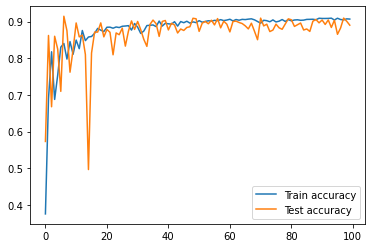

In [18]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();